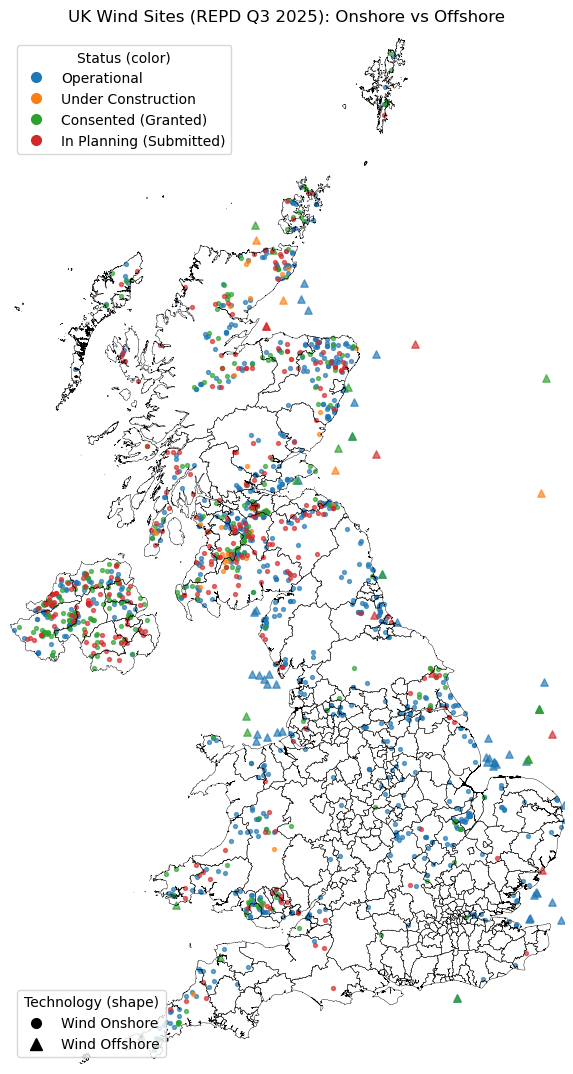

Saved to: /Users/jsh/Desktop/assignment2 spatial/uk_wind_onshore_offshore_clean_black_boundary.png


In [7]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pyproj import Transformer


base_dir = Path("/Users/jsh/Desktop/assignment2 spatial")

boundary_path = base_dir / "uk boundary.geojson"
on_csv = base_dir / "REPD_Wind_Onshore_Sites_Q3_2025.csv"
off_csv = base_dir / "REPD_Wind_Offshore_Sites_Q3_2025.csv"

out_png = base_dir / "uk_wind_onshore_offshore_clean_black_boundary.png"


with open(boundary_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

def iter_rings(geom):
    gtype = geom["type"]
    coords = geom["coordinates"]
    if gtype == "Polygon":
        for ring in coords:
            yield ring
    elif gtype == "MultiPolygon":
        for poly in coords:
            for ring in poly:
                yield ring

to27700 = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

rings_27700 = []
minx = miny = float("inf")
maxx = maxy = float("-inf")

for feat in gj.get("features", []):
    geom = feat.get("geometry")
    if not geom:
        continue
    for ring in iter_rings(geom) or []:
        xs = [p[0] for p in ring]  # lon
        ys = [p[1] for p in ring]  # lat
        X, Y = to27700.transform(xs, ys)  # -> Easting/Northing (m)

        ring_xy = list(zip(X, Y))
        rings_27700.append(ring_xy)

        minx, maxx = min(minx, min(X)), max(maxx, max(X))
        miny, maxy = min(miny, min(Y)), max(maxy, max(Y))


on = pd.read_csv(on_csv)
off = pd.read_csv(off_csv)

for d in (on, off):
    d["X-coordinate"] = pd.to_numeric(d["X-coordinate"], errors="coerce")
    d["Y-coordinate"] = pd.to_numeric(d["Y-coordinate"], errors="coerce")
    d["Development Status"] = d["Development Status"].astype(str).str.strip()
    d.dropna(subset=["X-coordinate", "Y-coordinate"], inplace=True)

keep_status = {
    "Operational": "Operational",
    "Under Construction": "Under Construction",
    "Planning Permission Granted": "Consented (Granted)",
    "Planning Application Submitted": "In Planning (Submitted)",
}

on["StatusCat"] = on["Development Status"].map(keep_status)
off["StatusCat"] = off["Development Status"].map(keep_status)

on_f = on.dropna(subset=["StatusCat"]).copy()
off_f = off.dropna(subset=["StatusCat"]).copy()


cats = ["Operational", "Under Construction", "Consented (Granted)", "In Planning (Submitted)"]
cmap = plt.get_cmap("tab10")
cat_color = {cat: cmap(i) for i, cat in enumerate(cats)}

fig, ax = plt.subplots(figsize=(9, 11))

for ring_xy in rings_27700:
    xs = [p[0] for p in ring_xy]
    ys = [p[1] for p in ring_xy]
    ax.plot(xs, ys, color="black", linewidth=0.3)

for cat in cats:
    on_cat = on_f[on_f["StatusCat"] == cat]
    off_cat = off_f[off_f["StatusCat"] == cat]

    ax.scatter(on_cat["X-coordinate"], on_cat["Y-coordinate"],
               s=8, marker="o", alpha=0.65, color=cat_color[cat])
    ax.scatter(off_cat["X-coordinate"], off_cat["Y-coordinate"],
               s=28, marker="^", alpha=0.65, color=cat_color[cat])


ax.set_aspect("equal", adjustable="box")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


ax.set_axis_off()

ax.set_title("UK Wind Sites (REPD Q3 2025): Onshore vs Offshore", pad=12)

status_handles = [
    Line2D([0], [0], marker="o", linestyle="None",
           markerfacecolor=cat_color[cat], markeredgecolor=cat_color[cat],
           markersize=7, label=cat)
    for cat in cats
]
type_handles = [
    Line2D([0], [0], marker="o", linestyle="None",
           markerfacecolor="black", markeredgecolor="black",
           markersize=7, label="Wind Onshore"),
    Line2D([0], [0], marker="^", linestyle="None",
           markerfacecolor="black", markeredgecolor="black",
           markersize=8, label="Wind Offshore"),
]

leg1 = ax.legend(handles=status_handles, title="Status (color)",
                 loc="upper left", frameon=True)
ax.add_artist(leg1)
ax.legend(handles=type_handles, title="Technology (shape)",
          loc="lower left", frameon=True)

plt.tight_layout()
plt.savefig(out_png, dpi=300, bbox_inches="tight")
plt.show()

print("Saved to:", out_png)


Saved: /Users/jsh/Desktop/assignment2 spatial/uk_wind_onshore_only.png


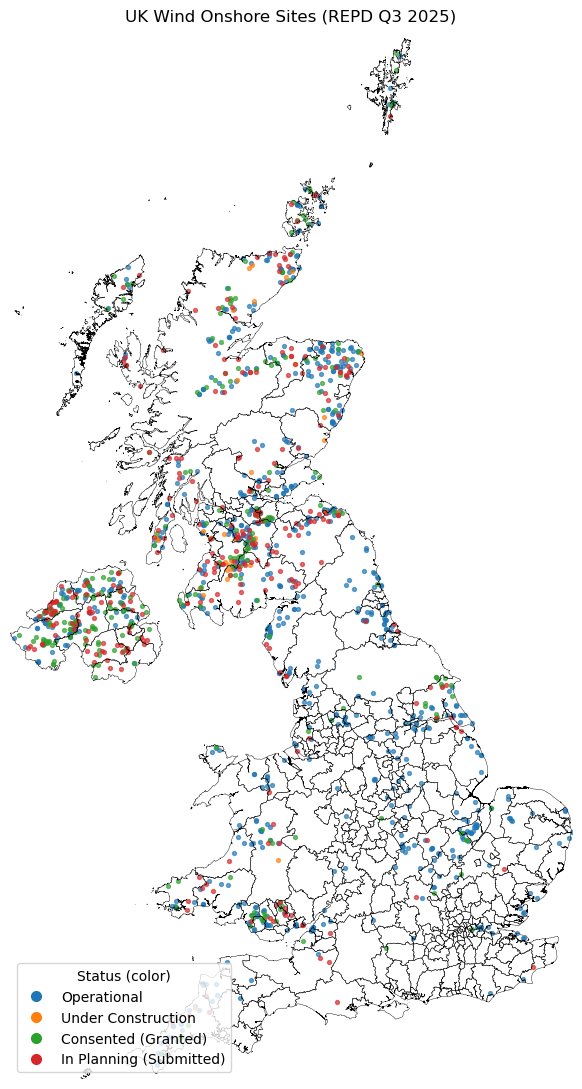

Saved: /Users/jsh/Desktop/assignment2 spatial/uk_wind_offshore_only.png


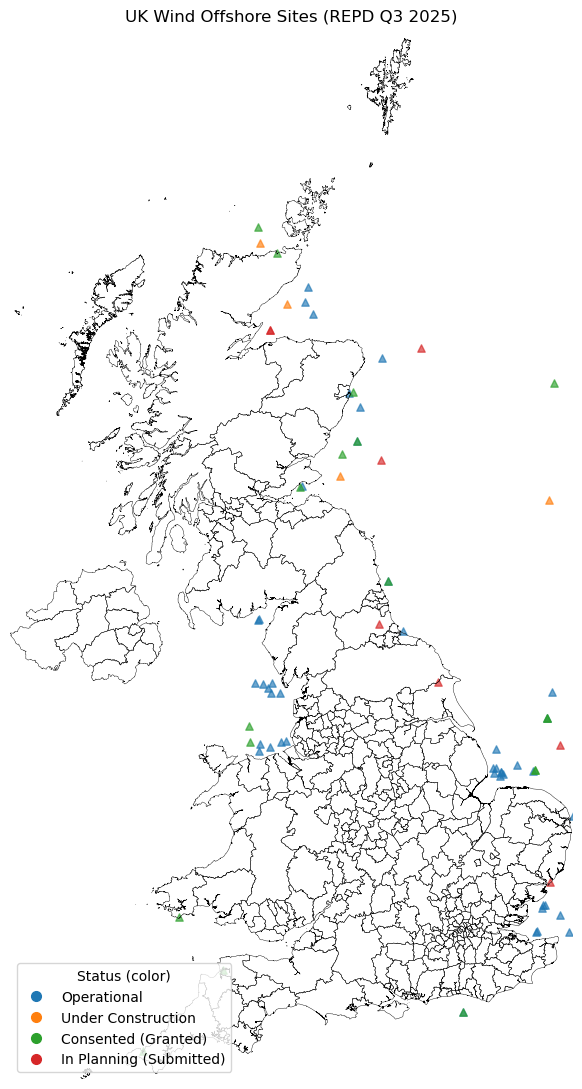

In [9]:
base_dir = Path("/Users/jsh/Desktop/assignment2 spatial")

boundary_path = base_dir / "uk boundary.geojson"
on_csv = base_dir / "REPD_Wind_Onshore_Sites_Q3_2025.csv"
off_csv = base_dir / "REPD_Wind_Offshore_Sites_Q3_2025.csv"

out_on_png = base_dir / "uk_wind_onshore_only.png"
out_off_png = base_dir / "uk_wind_offshore_only.png"


with open(boundary_path, "r", encoding="utf-8") as f:
    gj = json.load(f)

def iter_rings(geom):
    gtype = geom["type"]
    coords = geom["coordinates"]
    if gtype == "Polygon":
        for ring in coords:
            yield ring
    elif gtype == "MultiPolygon":
        for poly in coords:
            for ring in poly:
                yield ring

to27700 = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)

rings_27700 = []
minx = miny = float("inf")
maxx = maxy = float("-inf")

for feat in gj.get("features", []):
    geom = feat.get("geometry")
    if not geom:
        continue
    for ring in iter_rings(geom) or []:
        xs = [p[0] for p in ring]  # lon
        ys = [p[1] for p in ring]  # lat
        X, Y = to27700.transform(xs, ys)

        ring_xy = list(zip(X, Y))
        rings_27700.append(ring_xy)

        minx, maxx = min(minx, min(X)), max(maxx, max(X))
        miny, maxy = min(miny, min(Y)), max(maxy, max(Y))

on = pd.read_csv(on_csv)
off = pd.read_csv(off_csv)

for d in (on, off):
    d["X-coordinate"] = pd.to_numeric(d["X-coordinate"], errors="coerce")
    d["Y-coordinate"] = pd.to_numeric(d["Y-coordinate"], errors="coerce")
    d["Development Status"] = d["Development Status"].astype(str).str.strip()
    d.dropna(subset=["X-coordinate", "Y-coordinate"], inplace=True)


keep_status = {
    "Operational": "Operational",
    "Under Construction": "Under Construction",
    "Planning Permission Granted": "Consented (Granted)",
    "Planning Application Submitted": "In Planning (Submitted)",
}

on["StatusCat"] = on["Development Status"].map(keep_status)
off["StatusCat"] = off["Development Status"].map(keep_status)

on_f = on.dropna(subset=["StatusCat"]).copy()
off_f = off.dropna(subset=["StatusCat"]).copy()

cats = ["Operational", "Under Construction", "Consented (Granted)", "In Planning (Submitted)"]
cmap = plt.get_cmap("tab10")
cat_color = {cat: cmap(i) for i, cat in enumerate(cats)}


def plot_one(ax, df_points, title, marker, point_size, out_path):
    for ring_xy in rings_27700:
        xs = [p[0] for p in ring_xy]
        ys = [p[1] for p in ring_xy]
        ax.plot(xs, ys, color="black", linewidth=0.3)

    for cat in cats:
        sub = df_points[df_points["StatusCat"] == cat]
        ax.scatter(
            sub["X-coordinate"], sub["Y-coordinate"],
            s=point_size, marker=marker, alpha=0.65,
            color=cat_color[cat]
        )


    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_axis_off()
    ax.set_title(title, pad=12)

    status_handles = [
        Line2D([0], [0], marker="o", linestyle="None",
               markerfacecolor=cat_color[cat], markeredgecolor=cat_color[cat],
               markersize=7, label=cat)
        for cat in cats
    ]
    ax.legend(handles=status_handles, title="Status (color)",
              loc="lower left", frameon=True)

    plt.tight_layout()
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    print("Saved:", out_path)


fig, ax = plt.subplots(figsize=(9, 11))
plot_one(ax, on_f, "UK Wind Onshore Sites (REPD Q3 2025)", marker="o", point_size=8, out_path=out_on_png)
plt.show()

fig, ax = plt.subplots(figsize=(9, 11))
plot_one(ax, off_f, "UK Wind Offshore Sites (REPD Q3 2025)", marker="^", point_size=28, out_path=out_off_png)
plt.show()


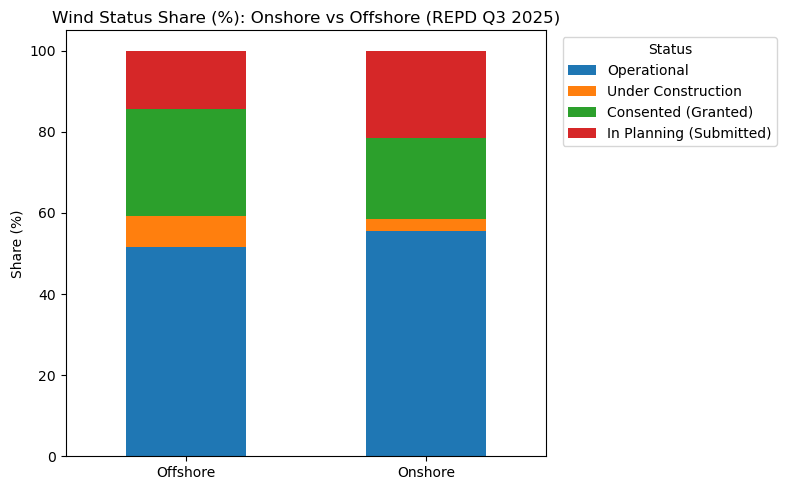

Saved: /Users/jsh/Desktop/assignment2 spatial/status_share_onshore_vs_offshore.png


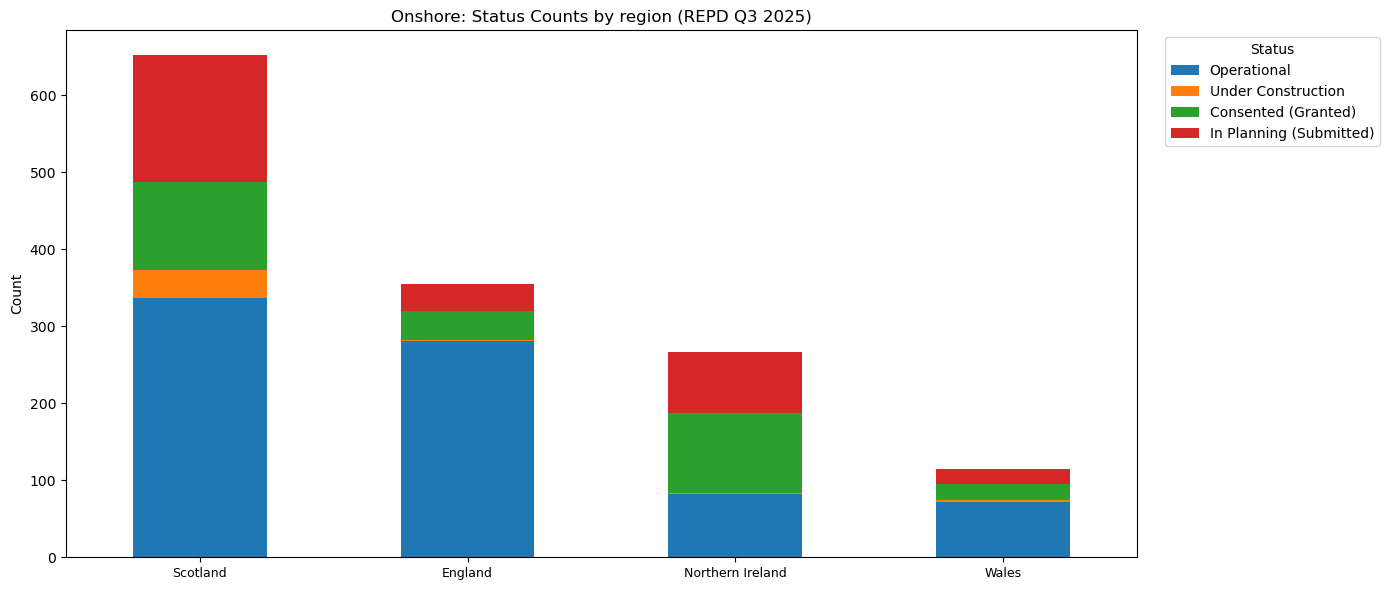

Saved: /Users/jsh/Desktop/assignment2 spatial/onshore_status_by_country.png


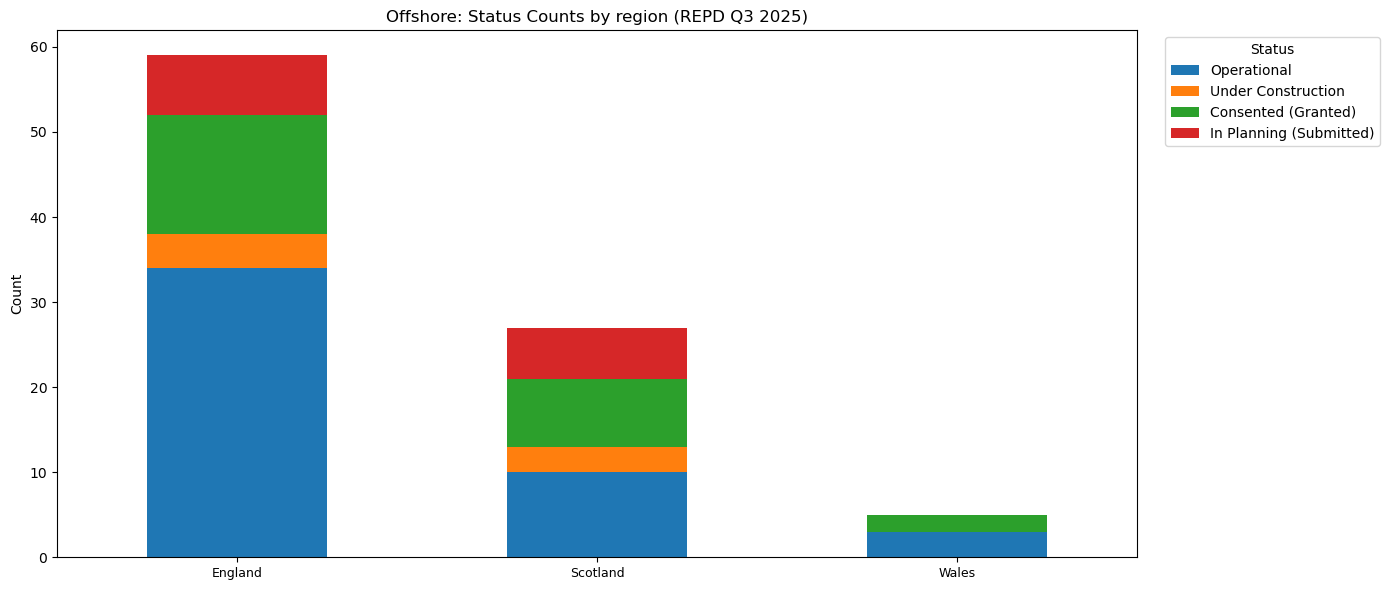

Saved: /Users/jsh/Desktop/assignment2 spatial/offshore_status_by_country.png
Saved tables: /Users/jsh/Desktop/assignment2 spatial/summary_tables_wind_status.xlsx

=== Onshore counts (kept statuses) ===
StatusCat
Operational                772
In Planning (Submitted)    298
Consented (Granted)        279
Under Construction          40
Name: count, dtype: int64

=== Offshore counts (kept statuses) ===
StatusCat
Operational                47
Consented (Granted)        24
In Planning (Submitted)    13
Under Construction          7
Name: count, dtype: int64


In [1]:
base_dir = Path("/Users/jsh/Desktop/assignment2 spatial")
repd_xlsx = base_dir / "REPD_Publication_Q3_2025.xlsx"

out_share_png = base_dir / "status_share_onshore_vs_offshore.png"
out_country_on_png = base_dir / "onshore_status_by_country.png"
out_country_off_png = base_dir / "offshore_status_by_country.png"
out_tables_xlsx = base_dir / "summary_tables_wind_status.xlsx"


df = pd.read_excel(repd_xlsx, sheet_name="REPD")


df["Technology Type"] = df["Technology Type"].astype(str).str.strip().str.lower()
wind = df[df["Technology Type"].isin(["wind onshore", "wind offshore"])].copy()


keep_status = {
    "Operational": "Operational",
    "Under Construction": "Under Construction",
    "Planning Permission Granted": "Consented (Granted)",
    "Planning Application Submitted": "In Planning (Submitted)",
}

wind["Development Status"] = wind["Development Status"].astype(str).str.strip()
wind["StatusCat"] = wind["Development Status"].map(keep_status)
wind = wind.dropna(subset=["StatusCat"]).copy()

wind["Tech"] = wind["Technology Type"].map({
    "wind onshore": "Onshore",
    "wind offshore": "Offshore"
})


wind["Country"] = wind["Country"].fillna("Unknown").astype(str).str.strip()

cats_order = ["Operational", "Under Construction", "Consented (Granted)", "In Planning (Submitted)"]


counts = (
    wind.groupby(["Tech", "StatusCat"])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=cats_order, fill_value=0)
)

shares = counts.div(counts.sum(axis=1), axis=0) * 100

ax = shares.plot(kind="bar", stacked=True, figsize=(8, 5))
ax.set_title("Wind Status Share (%): Onshore vs Offshore (REPD Q3 2025)")
ax.set_xlabel("")
ax.set_ylabel("Share (%)")
ax.legend(title="Status", bbox_to_anchor=(1.02, 1), loc="upper left")


ax.tick_params(axis="x", labelrotation=0, labelsize=10)
for t in ax.get_xticklabels():
    t.set_ha("center")

plt.tight_layout()
plt.savefig(out_share_png, dpi=300, bbox_inches="tight")
plt.show()
print("Saved:", out_share_png)


def plot_status_by_country(sub_df: pd.DataFrame, title: str, out_png: Path):
    tab = (
        sub_df.groupby(["Country", "StatusCat"])
              .size()
              .unstack(fill_value=0)
              .reindex(columns=cats_order, fill_value=0)
              .sort_values(by="Operational", ascending=False)
    )

    ax = tab.plot(kind="bar", stacked=True, figsize=(14, 6)) 
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.legend(title="Status", bbox_to_anchor=(1.02, 1), loc="upper left")

    ax.tick_params(axis="x", labelrotation=0, labelsize=9)
    for t in ax.get_xticklabels():
        t.set_ha("center")

    plt.tight_layout()
    plt.savefig(out_png, dpi=300, bbox_inches="tight")
    plt.show()

    print("Saved:", out_png)
    return tab

on_tab = plot_status_by_country(
    wind[wind["Tech"] == "Onshore"],
    "Onshore: Status Counts by region (REPD Q3 2025)",
    out_country_on_png
)

off_tab = plot_status_by_country(
    wind[wind["Tech"] == "Offshore"],
    "Offshore: Status Counts by region (REPD Q3 2025)",
    out_country_off_png
)


with pd.ExcelWriter(out_tables_xlsx, engine="openpyxl") as w:
    counts.to_excel(w, sheet_name="Counts_OnOff_Status")
    shares.to_excel(w, sheet_name="Shares_%_OnOff_Status")
    on_tab.to_excel(w, sheet_name="Onshore_by_Country")
    off_tab.to_excel(w, sheet_name="Offshore_by_Country")

print("Saved tables:", out_tables_xlsx)


print("\n=== Onshore counts (kept statuses) ===")
print(wind[wind["Tech"] == "Onshore"]["StatusCat"].value_counts())

print("\n=== Offshore counts (kept statuses) ===")
print(wind[wind["Tech"] == "Offshore"]["StatusCat"].value_counts())


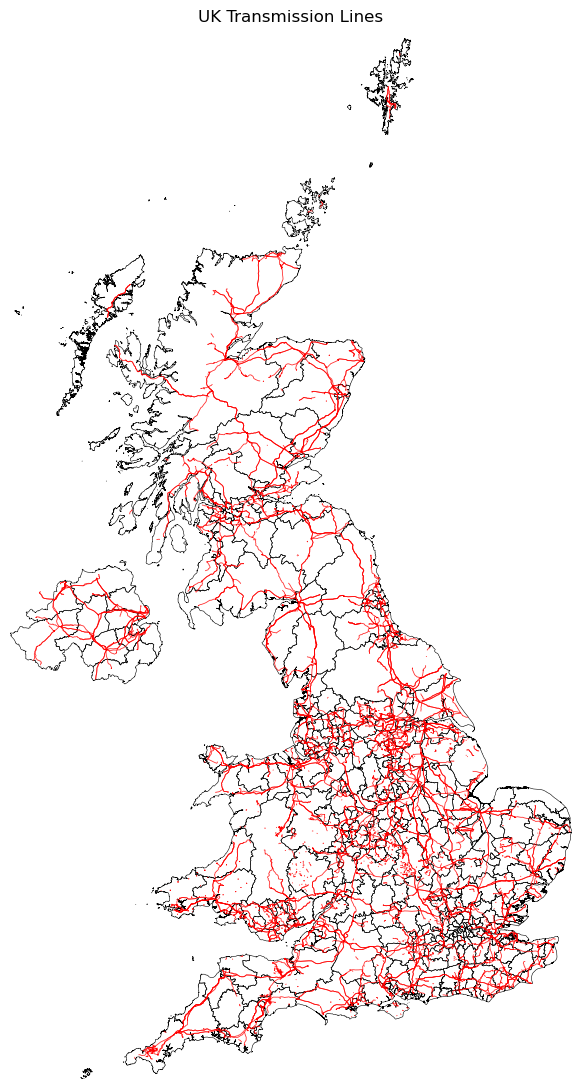

Lines CRS guessed as: EPSG:4326
Saved to: /Users/jsh/Desktop/assignment2 spatial/uk_transmission_lines_map.png


In [4]:
base_dir = Path("/Users/jsh/Desktop/assignment2 spatial")
boundary_path = base_dir / "uk boundary.geojson"
lines_path = base_dir / "uk_transmission_lines.geojson"
out_png = base_dir / "uk_transmission_lines_map.png"


with open(boundary_path, "r", encoding="utf-8") as f:
    uk_gj = json.load(f)

with open(lines_path, "r", encoding="utf-8") as f:
    lines_gj = json.load(f)


def iter_polygon_rings(geom):
    gtype = geom["type"]
    coords = geom["coordinates"]
    if gtype == "Polygon":
        for ring in coords:
            yield ring
    elif gtype == "MultiPolygon":
        for poly in coords:
            for ring in poly:
                yield ring


def iter_line_segments(geom):
    gtype = geom["type"]
    coords = geom["coordinates"]

    if gtype == "LineString":
        yield coords
    elif gtype == "MultiLineString":
        for seg in coords:
            yield seg
    elif gtype == "GeometryCollection":
        for g in geom.get("geometries", []):
            yield from iter_line_segments(g)


def guess_lines_crs(lines_geojson):
    for feat in lines_geojson.get("features", []):
        geom = feat.get("geometry")
        if not geom:
            continue
        for seg in iter_line_segments(geom) or []:
            if not seg:
                continue
            x, y = seg[0][0], seg[0][1]
            if abs(x) > 1000 or abs(y) > 1000:
                return "EPSG:27700"
            else:
                return "EPSG:4326"
    return "EPSG:4326"

lines_crs = guess_lines_crs(lines_gj)


to27700_from_4326 = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)


uk_rings_27700 = []
minx = miny = float("inf")
maxx = maxy = float("-inf")

for feat in uk_gj.get("features", []):
    geom = feat.get("geometry")
    if not geom:
        continue
    for ring in iter_polygon_rings(geom) or []:
        xs = [p[0] for p in ring]  # lon
        ys = [p[1] for p in ring]  # lat
        X, Y = to27700_from_4326.transform(xs, ys)
        ring_xy = list(zip(X, Y))
        uk_rings_27700.append(ring_xy)

        minx, maxx = min(minx, min(X)), max(maxx, max(X))
        miny, maxy = min(miny, min(Y)), max(maxy, max(Y))

line_segs_27700 = []
for feat in lines_gj.get("features", []):
    geom = feat.get("geometry")
    if not geom:
        continue
    for seg in iter_line_segments(geom) or []:
        if not seg:
            continue
        xs = [p[0] for p in seg]
        ys = [p[1] for p in seg]
        if lines_crs == "EPSG:4326":
            X, Y = to27700_from_4326.transform(xs, ys)
        else:
            X, Y = xs, ys
        line_segs_27700.append((X, Y))


fig, ax = plt.subplots(figsize=(9, 11))


for ring_xy in uk_rings_27700:
    xs = [p[0] for p in ring_xy]
    ys = [p[1] for p in ring_xy]
    ax.plot(xs, ys, color="black", linewidth=0.4)


for X, Y in line_segs_27700:
    ax.plot(X, Y, color="red", linewidth=0.6, alpha=0.8)

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)


ax.set_axis_off()
ax.set_title("UK Transmission Lines", pad=12)

plt.tight_layout()
plt.savefig(out_png, dpi=300, bbox_inches="tight")
plt.show()

print("Lines CRS guessed as:", lines_crs)
print("Saved to:", out_png)


In [13]:
import os


url = "https://ourairports.com/data/airports.csv"
df = pd.read_csv(url)


uk = df[df["iso_country"] == "GB"].copy()


uk_main = uk[uk["type"].isin(["large_airport", "medium_airport"])].copy()


uk_scheduled = uk_main[uk_main["scheduled_service"].fillna("").str.lower() == "yes"].copy()


out_path = "/Users/jsh/Desktop/assignment2 spatial/uk_airports_points.csv"
cols = [
    "name", "iata_code", "ident",
    "latitude_deg", "longitude_deg",
    "type", "municipality", "scheduled_service"
]


os.makedirs(os.path.dirname(out_path), exist_ok=True)

uk_scheduled[cols].to_csv(out_path, index=False, encoding="utf-8")
print(f"✅ 已导出 {len(uk_scheduled)} 条机场记录到：{out_path}")


print("type 统计：")
print(uk_scheduled["type"].value_counts())



✅ 已导出 40 条机场记录到：/Users/jsh/Desktop/assignment2 spatial/uk_airports_points.csv
type 统计：
type
medium_airport    31
large_airport      9
Name: count, dtype: int64


/var/folders/q3/r_v4tt3n0hqb53bp2w2dg2hm0000gn/T/ipykernel_31242/1248301085.py:40: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  air_3857 = air_3857[air_3857.within(uk_3857.unary_union)]


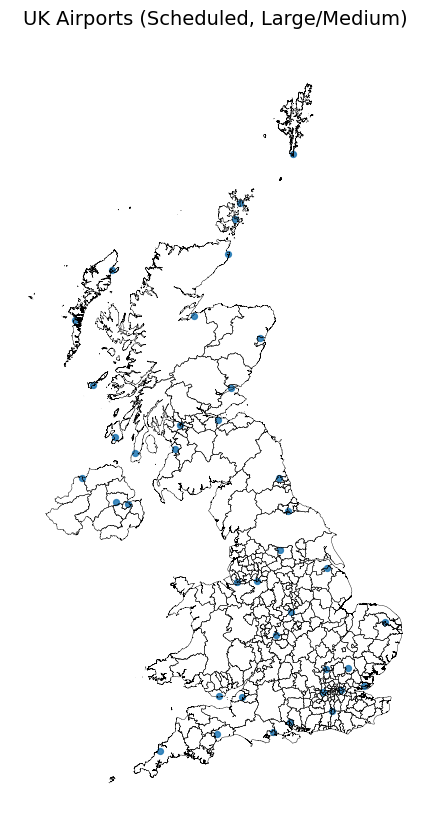

✅ Done. Points plotted: 39
✅ Saved to: /Users/jsh/Desktop/assignment2 spatial/uk_airports_map.png


In [10]:
airports_csv = "/Users/jsh/Desktop/assignment2 spatial/uk_airports_points.csv"
uk_boundary_geojson = "/Users/jsh/Desktop/assignment2 spatial/uk boundary.geojson"

uk = gpd.read_file(uk_boundary_geojson)


if uk.crs is None:
    uk = uk.set_crs("EPSG:4326")


df = pd.read_csv(airports_csv)


gdf_air = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["longitude_deg"], df["latitude_deg"]),
    crs="EPSG:4326"
)


uk_3857 = uk.to_crs("EPSG:3857")
air_3857 = gdf_air.to_crs("EPSG:3857")

air_3857 = air_3857[air_3857.within(uk_3857.unary_union)]

fig, ax = plt.subplots(figsize=(8, 10))

uk_3857.boundary.plot(ax=ax, linewidth=0.3, color="black")


ax.scatter(
    air_3857.geometry.x,
    air_3857.geometry.y,
    s=18,          
    alpha=0.85     
)


ax.set_axis_off()
ax.set_title("UK Airports (Scheduled, Large/Medium)", fontsize=14)

out_png = "/Users/jsh/Desktop/assignment2 spatial/uk_airports_map.png"
plt.savefig(out_png, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Done. Points plotted: {len(air_3857)}")
print(f"✅ Saved to: {out_png}")


/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:168: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


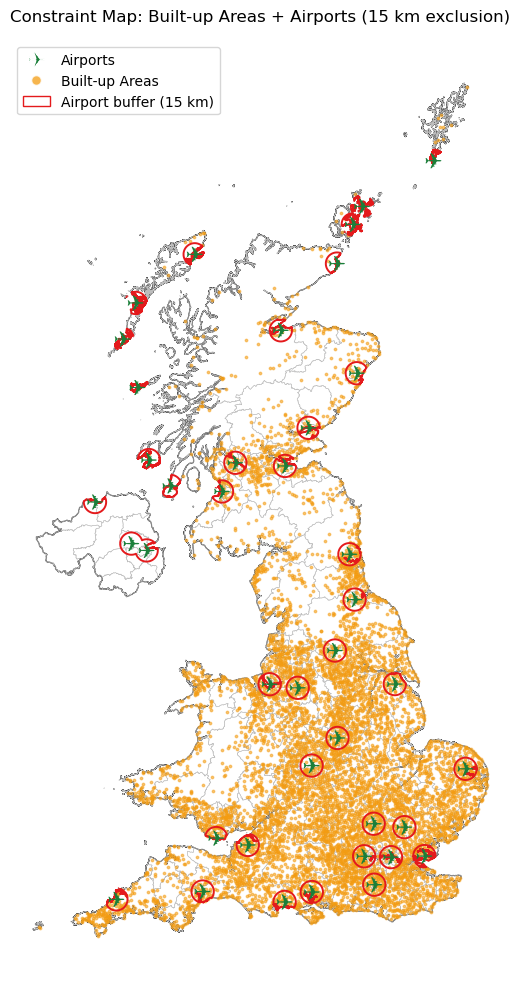

✅ saved: /Users/jsh/Desktop/assignment2 spatial/constraint_urban_airports_15km_style_like_example.png


In [17]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point

BASE = "/Users/jsh/Desktop/assignment2 spatial"

UK_BOUNDARY   = os.path.join(BASE, "uk boundary.geojson")
RESIDENT_XLSX  = os.path.join(BASE, "resident.xlsx")
AIRPORTS_CSV   = os.path.join(BASE, "uk_airports_points.csv")

OUT_PNG = os.path.join(BASE, "constraint_urban_airports_15km_style_like_example.png")

BUFFER_M = 15000
TARGET_CRS = "EPSG:3035"


lad = gpd.read_file(UK_BOUNDARY).to_crs(TARGET_CRS)
uk_outline = lad.dissolve()


res = pd.read_excel(RESIDENT_XLSX)
need_cols = ["BNG_E", "BNG_N"]
for c in need_cols:
    if c not in res.columns:
        raise ValueError(f"resident.xlsx missing column: {c}")

res = res.dropna(subset=["BNG_E", "BNG_N"]).copy()

builtup = gpd.GeoDataFrame(
    res,
    geometry=[Point(xy) for xy in zip(res["BNG_E"].to_numpy(), res["BNG_N"].to_numpy())],
    crs="EPSG:27700"
).to_crs(TARGET_CRS)


ap = pd.read_csv(AIRPORTS_CSV)
for c in ["longitude_deg", "latitude_deg"]:
    if c not in ap.columns:
        raise ValueError(f"uk_airports_points.csv missing column: {c}")

airports = gpd.GeoDataFrame(
    ap,
    geometry=gpd.points_from_xy(ap["longitude_deg"], ap["latitude_deg"]),
    crs="EPSG:4326"
).to_crs(TARGET_CRS)

airport_buf = airports.copy()
airport_buf["geometry"] = airport_buf.geometry.buffer(BUFFER_M)
airport_buf = airport_buf.dissolve()

airport_buf_clip = gpd.overlay(
    airport_buf.reset_index(drop=True),
    uk_outline.reset_index(drop=True),
    how="intersection"
)


fig, ax = plt.subplots(figsize=(7, 10))


uk_outline.boundary.plot(ax=ax, color="#4d4d4d", linewidth=0.8, zorder=1)


lad.boundary.plot(ax=ax, color="#bdbdbd", linewidth=0.35, zorder=1)


builtup.plot(ax=ax, color="#f39c12", markersize=3, alpha=0.55, zorder=2)


airport_buf_clip.boundary.plot(ax=ax, color="#e41a1c", linewidth=1.4, zorder=3)


ax.scatter(
    airports.geometry.x,
    airports.geometry.y,
    marker="$✈$",
    s=130,                    
    color="#1b7f3a",          
    edgecolors="none",
    zorder=4
)


ax.set_title("Constraint Map: Built-up Areas + Airports (15 km exclusion)", pad=14)
ax.set_axis_off()


air_handle = plt.Line2D([0], [0], marker="$✈$", color="w",
                        markerfacecolor="#1b7f3a", markersize=12, label="Airports")
built_handle = plt.Line2D([0], [0], marker="o", color="w",
                          markerfacecolor="#f39c12", markersize=7, alpha=0.75, label="Built-up Areas")
buf_handle = mpatches.Patch(facecolor="none", edgecolor="#e41a1c", label="Airport buffer (15 km)")

ax.legend(handles=[air_handle, built_handle, buf_handle],
          loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=300)
plt.show()

print("✅ saved:", OUT_PNG)


✅ saved final mask: /Users/jsh/Desktop/assignment2 spatial/uk_final_mask_all_constraints.tif


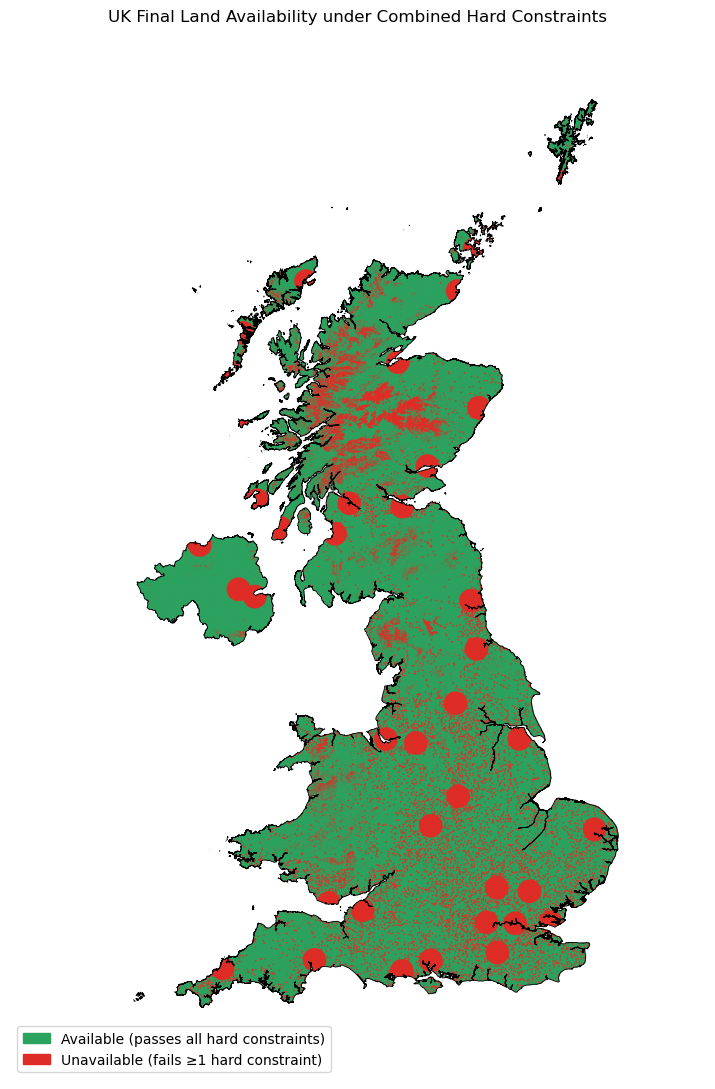

✅ saved final map: /Users/jsh/Desktop/assignment2 spatial/uk_final_available_vs_unavailable.png


In [19]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from shapely.geometry import Point

BASE = "/Users/jsh/Desktop/assignment2 spatial"


DEM_3035 = os.path.join(BASE, "uk_dem_clipped_UK_epsg3035.tif")  
BOUNDARY = os.path.join(BASE, "uk boundary.geojson")

SLOPE_MASK = os.path.join(BASE, "uk_slope_gt15_epsg3035.tif")   
ELEV_MASK  = os.path.join(BASE, "uk_elev_gtH_epsg3035.tif")     

RESIDENT_XLSX = os.path.join(BASE, "resident.xlsx")            
AIRPORTS_CSV  = os.path.join(BASE, "uk_airports_points.csv")    


FINAL_MASK_TIF = os.path.join(BASE, "uk_final_mask_all_constraints.tif")
FINAL_MAP_PNG  = os.path.join(BASE, "uk_final_available_vs_unavailable.png")

BUFFER_M = 15000  
TARGET_CRS = "EPSG:3035"


with rasterio.open(DEM_3035) as ref:
    ref_meta = ref.meta.copy()
    ref_transform = ref.transform
    ref_crs = ref.crs
    ref_shape = (ref.height, ref.width)
    extent = (ref.bounds.left, ref.bounds.right, ref.bounds.bottom, ref.bounds.top)

    dem = ref.read(1).astype("float32")
    nodata = ref.nodata
    valid = (dem != nodata) if nodata is not None else ~np.isnan(dem)

with rasterio.open(SLOPE_MASK) as ssrc:
    slope_m = ssrc.read(1).astype("uint8")

with rasterio.open(ELEV_MASK) as esrc:
    elev_m = esrc.read(1).astype("uint8")


res = pd.read_excel(RESIDENT_XLSX)
for c in ["BNG_E", "BNG_N"]:
    if c not in res.columns:
        raise ValueError(f"resident.xlsx missing column: {c}")
res = res.dropna(subset=["BNG_E", "BNG_N"]).copy()

builtup_pts = gpd.GeoDataFrame(
    res,
    geometry=[Point(xy) for xy in zip(res["BNG_E"].to_numpy(), res["BNG_N"].to_numpy())],
    crs="EPSG:27700"
).to_crs(TARGET_CRS)


BUILTUP_BUFFER_M = 1000  # 1000m around each built-up point (adjust as you like)
if BUILTUP_BUFFER_M and BUILTUP_BUFFER_M > 0:
    builtup_geom = builtup_pts.geometry.buffer(BUILTUP_BUFFER_M)
else:
    builtup_geom = builtup_pts.geometry

builtup_shapes = ((geom, 1) for geom in builtup_geom if geom is not None and not geom.is_empty)
builtup_mask = rasterize(
    builtup_shapes,
    out_shape=ref_shape,
    transform=ref_transform,
    fill=0,
    dtype="uint8"
)


ap = pd.read_csv(AIRPORTS_CSV)
for c in ["longitude_deg", "latitude_deg"]:
    if c not in ap.columns:
        raise ValueError(f"uk_airports_points.csv missing column: {c}")

airports = gpd.GeoDataFrame(
    ap,
    geometry=gpd.points_from_xy(ap["longitude_deg"], ap["latitude_deg"]),
    crs="EPSG:4326"
).to_crs(TARGET_CRS)

airport_buf = airports.geometry.buffer(BUFFER_M)
airport_shapes = ((geom, 1) for geom in airport_buf if geom is not None and not geom.is_empty)
airport_mask = rasterize(
    airport_shapes,
    out_shape=ref_shape,
    transform=ref_transform,
    fill=0,
    dtype="uint8"
)


final_mask = np.zeros(ref_shape, dtype="uint8")
final_mask[valid & ((slope_m == 1) | (elev_m == 1) | (builtup_mask == 1) | (airport_mask == 1))] = 1
final_mask[~valid] = 0


out_meta = ref_meta.copy()
out_meta.update(dtype="uint8", count=1, nodata=0, compress="deflate")

with rasterio.open(FINAL_MASK_TIF, "w", **out_meta) as dst:
    dst.write(final_mask, 1)

print("✅ saved final mask:", FINAL_MASK_TIF)


uk_outline = gpd.read_file(BOUNDARY).dissolve().to_crs(ref_crs)

class_map = np.full(ref_shape, np.nan, dtype="float32")
class_map[valid & (final_mask == 0)] = 0  # available
class_map[valid & (final_mask == 1)] = 1  # unavailable

cmap = ListedColormap(["#2ca25f", "#de2d26"])  # green / red

fig, ax = plt.subplots(figsize=(9, 11))
ax.imshow(class_map, extent=extent, origin="upper", cmap=cmap, vmin=0, vmax=1)


uk_outline.boundary.plot(ax=ax, color="black", linewidth=0.6)

legend_handles = [
    mpatches.Patch(color="#2ca25f", label="Available (passes all hard constraints)"),
    mpatches.Patch(color="#de2d26", label="Unavailable (fails ≥1 hard constraint)")
]
ax.legend(handles=legend_handles, loc="lower left", frameon=True)

ax.set_title("UK Final Land Availability under Combined Hard Constraints")
ax.set_axis_off()
plt.tight_layout()
plt.savefig(FINAL_MAP_PNG, dpi=300)
plt.show()

print("✅ saved final map:", FINAL_MAP_PNG)


In [24]:
import os
os.environ["SHAPE_RESTORE_SHX"] = "YES"

import glob
import geopandas as gpd

BASE = "/Users/jsh/Desktop/assignment2 spatial"
PROT = os.path.join(BASE, "protected areas")

def quick_info(path, default_crs=None):
    try:
        gdf = gpd.read_file(path)
        crs = gdf.crs
        if crs is None and default_crs is not None:
            gdf = gdf.set_crs(default_crs)
            crs = gdf.crs

        n_all = len(gdf)
        n_geom = int(gdf.geometry.notna().sum()) if "geometry" in gdf else 0
        n_poly = int(gdf.geom_type.isin(["Polygon","MultiPolygon"]).sum()) if "geometry" in gdf else 0

        b = None
        try:
            b = gdf.total_bounds 
        except Exception:
            pass

        print(f"[OK] {os.path.basename(path)}")
        print(f"     CRS: {crs}")
        print(f"     rows: {n_all}, non-null geom: {n_geom}, polygons: {n_poly}")
        if b is not None:
            print(f"     bounds: {b}")
        print("")

    except Exception as e:
        print(f"[FAIL] {os.path.basename(path)}  -> {type(e).__name__}: {e}")
        print("")

spa_files = []
spa_files += glob.glob(os.path.join(PROT, "features*.json"))
spa_files += glob.glob(os.path.join(PROT, "SPA*NI*.*json"))
spa_files = [f for f in spa_files if not f.endswith(".textClipping")]

print("=== SPA candidate files ===")
for f in spa_files:
    quick_info(f, default_crs="EPSG:4326")

groups = {
    "SAC": [
        "Special_Areas_of_Conserv*.*json",
        "SAC_SCOTLAND*.shp",
        "*special-areas-of-conservation*.*json",
    ],
    "SSSI": [
        "SSSI_England.*json",
    ],
    "NationalParks": [
        "National_Parks_England.*json",
        "National_Parks_scotland.*json",
        "national park.*json",
    ],
    "AONB_NSA": [
        "Areas_of_Outstanding_Natural*.*json",
        "SG_NationalScenicAreas*.shp",
        "aonb-ni.*json",
    ],
}

print("\n=== Other groups (CRS scan) ===")
for gname, pats in groups.items():
    files = []
    for pat in pats:
        files += glob.glob(os.path.join(PROT, pat))
    files = [f for f in files if not f.endswith(".textClipping")]
    print(f"\n--- {gname} ({len(files)} files) ---")
    for f in files:
        dcrs = "EPSG:27700" if f.lower().endswith(".shp") else "EPSG:4326"
        quick_info(f, default_crs=dcrs)


=== SPA candidate files ===
[OK] features(1).json
     CRS: EPSG:27700
     rows: 24, non-null geom: 24, polygons: 24
     bounds: [116002.364  140857.869  374055.472  457212.2172]

[OK] SPA NI.geojson
     CRS: EPSG:4326
     rows: 16, non-null geom: 16, polygons: 16
     bounds: [-8.04145441 54.01458615 -5.40623079 55.32098272]


=== Other groups (CRS scan) ===

--- SAC (0 files) ---

--- SSSI (0 files) ---

--- NationalParks (1 files) ---
[OK] national park.geojson
     CRS: EPSG:4326
     rows: 15, non-null geom: 0, polygons: 0
     bounds: [nan nan nan nan]


--- AONB_NSA (3 files) ---
[OK] SG_NationalScenicAreas.shp
     CRS: EPSG:27700
     rows: 40, non-null geom: 40, polygons: 40
     bounds: [   5110.2301  547426.6198  463474.508  1220396.2496]

[OK] SG_NationalScenicAreas_1998.shp
     CRS: EPSG:27700
     rows: 40, non-null geom: 40, polygons: 40
     bounds: [   5110.2301  547426.6198  463474.508  1220396.2496]

[OK] aonb-ni.geojson
     CRS: EPSG:4326
     rows: 8, non-nu

[WARN] NRW_AONB.csv 找不到 WKT/geometry 列 -> 跳过 Wales AONB CSV
=== Matched files ===
SAC: 2 files
   - SAC_SCOTLAND.shp
   - Special_Areas_of_Conservation_England.geojson
SSSI: 1 files
   - SSSI_England.geojson
SPA: 2 files
   - SPA NI.geojson
   - features(1).json
NP: 2 files
   - National_Parks_England.geojson
   - National_Parks_scotland.geojson
AONB_NSA: 3 files
   - Areas_of_Outstanding_Natural_Beauty_England.geojson
   - SG_NationalScenicAreas.shp
   - aonb-ni.geojson


/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:168: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:168: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:168: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/shapely/set_operations.py:168: RuntimeWarning: invalid value encountere

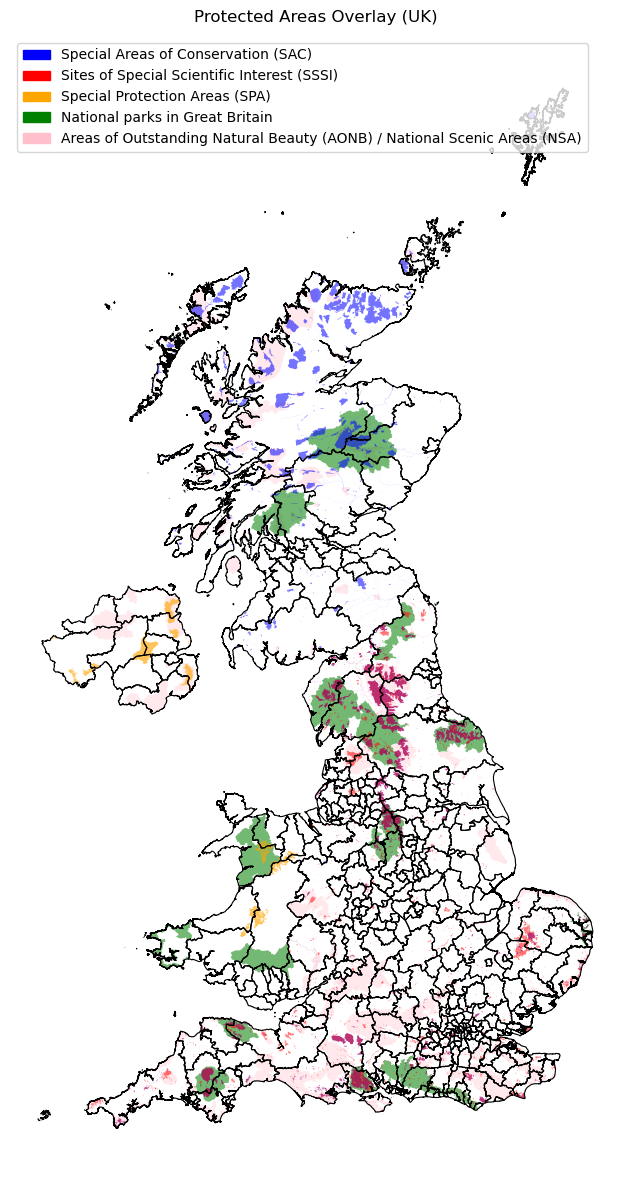

Saved: /Users/jsh/Desktop/assignment2 spatial/uk_protected_areas_overlay.png


In [30]:
os.environ["SHAPE_RESTORE_SHX"] = "YES"  

import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# =========================
# 0) Paths
# =========================
BASE = "/Users/jsh/Desktop/assignment2 spatial"
PROT = os.path.join(BASE, "protected areas")
uk_boundary_path = os.path.join(BASE, "uk boundary.geojson")

TARGET_EPSG = 3035
out_png = os.path.join(BASE, "uk_protected_areas_overlay.png")


def list_matches(patterns, root=PROT):
    """Find files recursively under root matching any pattern."""
    files = []
    for pat in patterns:
        files += glob.glob(os.path.join(root, "**", pat), recursive=True)
    files = [f for f in files if os.path.isfile(f)]
    files = [f for f in files if (not f.endswith(".textClipping")) and (not f.lower().endswith(".xml"))]
    
    exts = (".shp", ".geojson", ".json", ".gpkg")
    files = [f for f in files if f.lower().endswith(exts)]
 
    files = sorted(list(dict.fromkeys(files)))
    return files

def infer_crs_if_missing(gdf):
    """
    如果 gdf.crs 缺失，用 bounds 粗略判断：
    - 坐标绝对值很大(>1000)：大概率米制投影(27700等)
    - 否则：大概率经纬度(4326)
    """
    if gdf.crs is not None:
        return gdf
    try:
        b = gdf.total_bounds
        if np.all(np.isfinite(b)) and np.nanmax(np.abs(b)) > 1000:
            return gdf.set_crs("EPSG:27700")
        else:
            return gdf.set_crs("EPSG:4326")
    except Exception:
        return gdf.set_crs("EPSG:4326")

def read_poly(path):
    g = gpd.read_file(path)
    g = infer_crs_if_missing(g)
    g = g[g.geometry.notna() & ~g.geometry.is_empty].copy()
    g = g[g.geom_type.isin(["Polygon", "MultiPolygon"])].copy()

    try:
        g["geometry"] = g.buffer(0)
    except Exception:
        pass
    return g

def read_wales_aonb_csv_if_exists():
    """
    如果还有 NRW_AONB.csv 且里面是 WKT 面，就自动读取。
    没有/不适用就返回 None。
    """
    csv_path = os.path.join(PROT, "NRW_AONB.csv")
    if not os.path.exists(csv_path):
        return None
    try:
        df = pd.read_csv(csv_path, encoding="utf-8", engine="python", on_bad_lines="skip")
        cand = [c for c in df.columns if c.lower() in ["wkt", "the_geom", "geom", "geometry"]]
        if not cand:
            print("[WARN] NRW_AONB.csv 找不到 WKT/geometry 列 -> 跳过 Wales AONB CSV")
            return None
        wkt_col = cand[0]
        g = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df[wkt_col]), crs="EPSG:4326")
        g = g[g.geometry.notna() & ~g.geometry.is_empty]
        g = g[g.geom_type.isin(["Polygon","MultiPolygon"])].copy()
        return g
    except Exception as e:
        print("[WARN] NRW_AONB.csv 读取失败 -> 跳过:", e)
        return None

def merge_to_union(files, uk_union):
    """
    读多个文件 -> 转 3035 -> clip -> union dissolve
    返回一个 GeoDataFrame (单一面)；如果为空返回 None
    """
    if not files:
        return None

    parts = []
    for f in files:
        try:
            g = read_poly(f)
            g = g.to_crs(epsg=TARGET_EPSG)
            g = gpd.clip(g, uk_union)
            if len(g) > 0:
                parts.append(g)
        except Exception as e:
            print("[SKIP]", os.path.basename(f), "|", e)

    if not parts:
        return None

    allg = gpd.GeoDataFrame(pd.concat(parts, ignore_index=True), crs=f"EPSG:{TARGET_EPSG}")
    geom = allg.geometry.union_all()
    return gpd.GeoDataFrame({"cat":["x"]}, geometry=[geom], crs=f"EPSG:{TARGET_EPSG}")


uk = gpd.read_file(uk_boundary_path)
uk = infer_crs_if_missing(uk)
uk = uk.to_crs(epsg=TARGET_EPSG)
uk = uk[uk.geometry.notna() & ~uk.geometry.is_empty].copy()
uk_union = uk.geometry.union_all()


patterns = {
    "SAC": [
        "*Special_Areas_of_Conserv*.*json",           # England SAC
        "*Special_Areas_of_Conservation*.*json",
        "*special-areas-of-conservation*.*json",      # NI SAC
        "SAC_SCOTLAND*.shp",                          # Scotland SAC
        "*SAC*SCOTLAND*.shp",
    ],
    "SSSI": [
        "SSSI*England*.*json",
        "*SSSI_England*.*json",
    ],
    "SPA": [
        "features*.json",                             # Wales SPA
        "SPA*NI*.*json",                              # NI SPA
        "*Special_Protection_Area*.*json",
    ],
    "NP": [
        "National_Parks*England*.*json",
        "National_Parks*scotland*.*json",
        "*National_Parks*.*json",
    ],
    "AONB_NSA": [
        "Areas_of_Outstanding_Natural*.*json",        # England AONB
        "*AONB*England*.*json",
        "aonb-ni.*json",                              # NI AONB
        "SG_NationalScenicAreas*.shp",                # Scotland NSA
    ],
}

files_by_cat = {k: list_matches(v) for k, v in patterns.items()}


if any("NationalScenicAreas_1998" in os.path.basename(f) for f in files_by_cat["AONB_NSA"]) and \
   any("NationalScenicAreas_1998" not in os.path.basename(f) for f in files_by_cat["AONB_NSA"]):
    files_by_cat["AONB_NSA"] = [f for f in files_by_cat["AONB_NSA"] if "NationalScenicAreas_1998" not in os.path.basename(f)]


wales_aonb_csv = read_wales_aonb_csv_if_exists()

print("=== Matched files ===")
for k, fs in files_by_cat.items():
    print(f"{k}: {len(fs)} files")
    for f in fs:
        print("   -", os.path.basename(f))
if wales_aonb_csv is not None:
    print("AONB_NSA: + NRW_AONB.csv (WKT polygons)")


SAC = merge_to_union(files_by_cat["SAC"], uk_union)
SSSI = merge_to_union(files_by_cat["SSSI"], uk_union)
SPA = merge_to_union(files_by_cat["SPA"], uk_union)
NP = merge_to_union(files_by_cat["NP"], uk_union)
AONB_NSA = merge_to_union(files_by_cat["AONB_NSA"], uk_union)

if wales_aonb_csv is not None and len(wales_aonb_csv) > 0:
    g = wales_aonb_csv.to_crs(epsg=TARGET_EPSG)
    g = gpd.clip(g, uk_union)
    if len(g) > 0:
        extra = g.geometry.union_all()
        if AONB_NSA is None:
            AONB_NSA = gpd.GeoDataFrame({"cat":["x"]}, geometry=[extra], crs=f"EPSG:{TARGET_EPSG}")
        else:
            AONB_NSA = gpd.GeoDataFrame({"cat":["x"]}, geometry=[AONB_NSA.geometry.iloc[0].union(extra)], crs=f"EPSG:{TARGET_EPSG}")

fig, ax = plt.subplots(figsize=(8, 12))

uk.boundary.plot(ax=ax, linewidth=0.8, color="black")

style = {
    "SAC":      dict(color="blue",   alpha=0.55),
    "SSSI":     dict(color="red",    alpha=0.55),
    "SPA":      dict(color="orange", alpha=0.65),
    "NP":       dict(color="green",  alpha=0.55),
    "AONB_NSA": dict(color="pink",   alpha=0.35),
}


if AONB_NSA is not None: AONB_NSA.plot(ax=ax, edgecolor="none", **style["AONB_NSA"])
if NP is not None:       NP.plot(ax=ax, edgecolor="none", **style["NP"])
if SAC is not None:      SAC.plot(ax=ax, edgecolor="none", **style["SAC"])
if SPA is not None:      SPA.plot(ax=ax, edgecolor="none", **style["SPA"])
if SSSI is not None:     SSSI.plot(ax=ax, edgecolor="none", **style["SSSI"])

handles = [
    mpatches.Patch(color=style["SAC"]["color"],      label="Special Areas of Conservation (SAC)"),
    mpatches.Patch(color=style["SSSI"]["color"],     label="Sites of Special Scientific Interest (SSSI)"),
    mpatches.Patch(color=style["SPA"]["color"],      label="Special Protection Areas (SPA)"),
    mpatches.Patch(color=style["NP"]["color"],       label="National parks in Great Britain"),
    mpatches.Patch(color=style["AONB_NSA"]["color"], label="Areas of Outstanding Natural Beauty (AONB) / National Scenic Areas (NSA)"),
]
ax.legend(handles=handles, loc="upper left", frameon=True)

ax.set_axis_off()
ax.set_title("Protected Areas Overlay (UK)", pad=10)

plt.tight_layout()
plt.savefig(out_png, dpi=300)
plt.show()

print("Saved:", out_png)


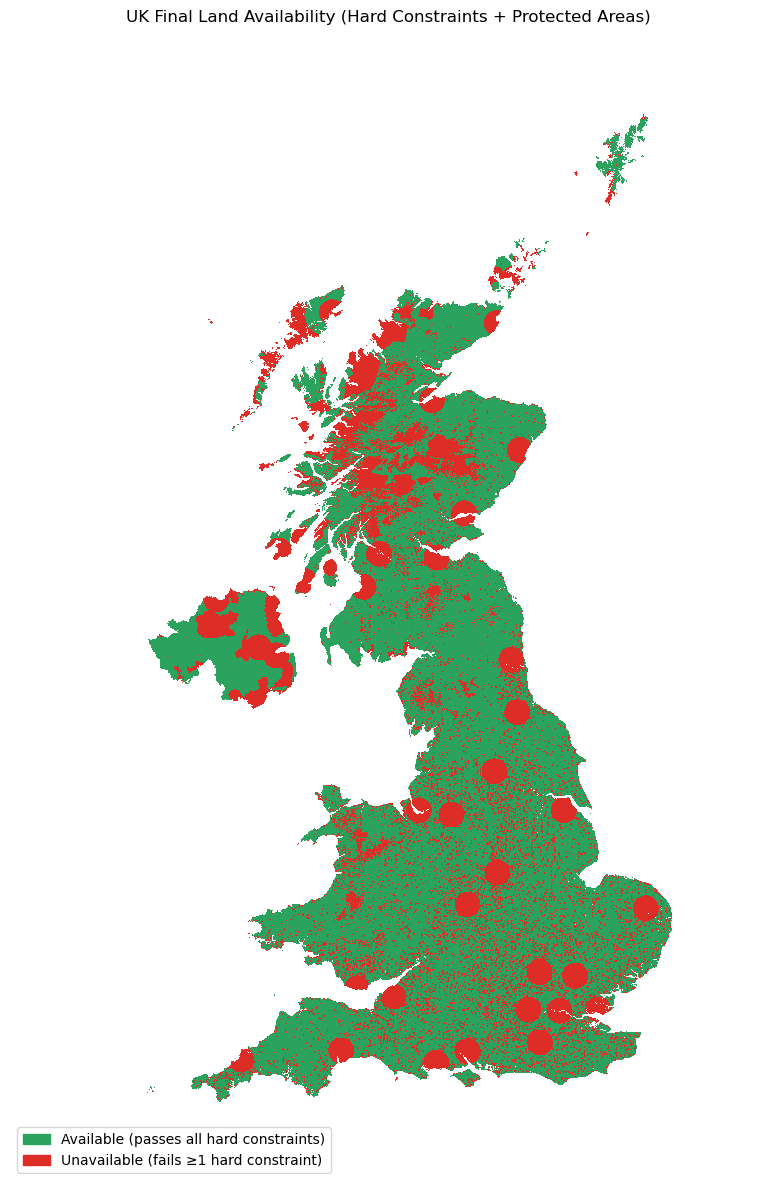

Saved fixed PNG: /Users/jsh/Desktop/assignment2 spatial/uk_available_vs_unavailable_plus_protected_FIXED.png


In [33]:
import rasterio
from rasterio.features import rasterize
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

BASE = "/Users/jsh/Desktop/assignment2 spatial"

hard_mask_tif = os.path.join(BASE, "uk_final_mask_all_constraints.tif")
prot_mask_tif = os.path.join(BASE, "uk_protected_areas_mask_epsg3035.tif")
uk_boundary_path = os.path.join(BASE, "uk boundary.geojson")

out_png = os.path.join(BASE, "uk_available_vs_unavailable_plus_protected_FIXED.png")


with rasterio.open(hard_mask_tif) as src_h:
    hard = src_h.read(1).astype(np.uint8)
    profile = src_h.profile.copy()
    transform = src_h.transform
    crs = src_h.crs
    shape = (src_h.height, src_h.width)


with rasterio.open(prot_mask_tif) as src_p:
    prot = src_p.read(1).astype(np.uint8)
    prot_crs = src_p.crs
    prot_transform = src_p.transform

from rasterio.warp import reproject, Resampling
prot_aligned = np.zeros(shape, dtype=np.uint8)
reproject(
    source=prot,
    destination=prot_aligned,
    src_transform=prot_transform,
    src_crs=prot_crs,
    dst_transform=transform,
    dst_crs=crs,
    resampling=Resampling.nearest
)


combined = np.maximum(hard, prot_aligned).astype(np.uint8)

if uk.crs is None:
    uk = uk.set_crs("EPSG:4326")
uk = uk.to_crs(crs)

uk_union = uk.geometry.union_all()
valid = rasterize(
    [(uk_union, 1)],
    out_shape=shape,
    transform=transform,
    fill=0,
    dtype="uint8",
    all_touched=False
).astype(bool)


plot_arr = combined.astype("float32")
plot_arr[~valid] = np.nan


cmap = ListedColormap(["#2ca25f", "#de2d26"])  
cmap.set_bad(color="white")  

fig, ax = plt.subplots(figsize=(10, 12))
ax.imshow(plot_arr, cmap=cmap, interpolation="nearest")
ax.set_title("UK Final Land Availability (Hard Constraints + Protected Areas)", pad=12)
ax.axis("off")

legend_handles = [
    mpatches.Patch(color="#2ca25f", label="Available (passes all hard constraints)"),
    mpatches.Patch(color="#de2d26", label="Unavailable (fails ≥1 hard constraint)"),
]
ax.legend(handles=legend_handles, loc="lower left", frameon=True)

plt.tight_layout()
plt.savefig(out_png, dpi=300)
plt.show()

print("Saved fixed PNG:", out_png)


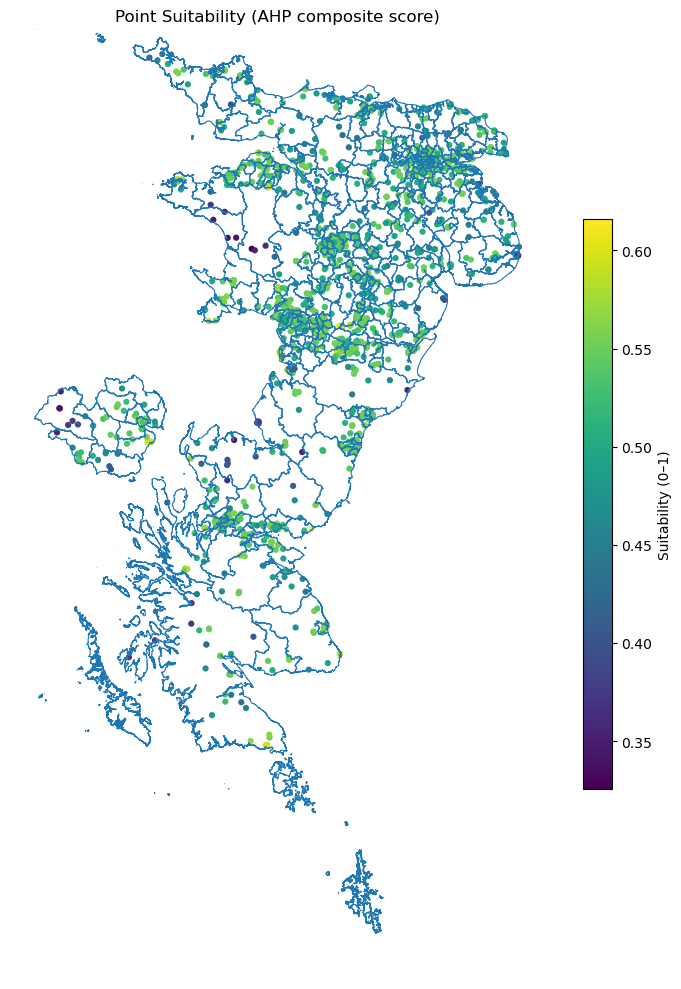

Saved: /Users/jsh/Desktop/assignment2 spatial/map_points_suitability.png


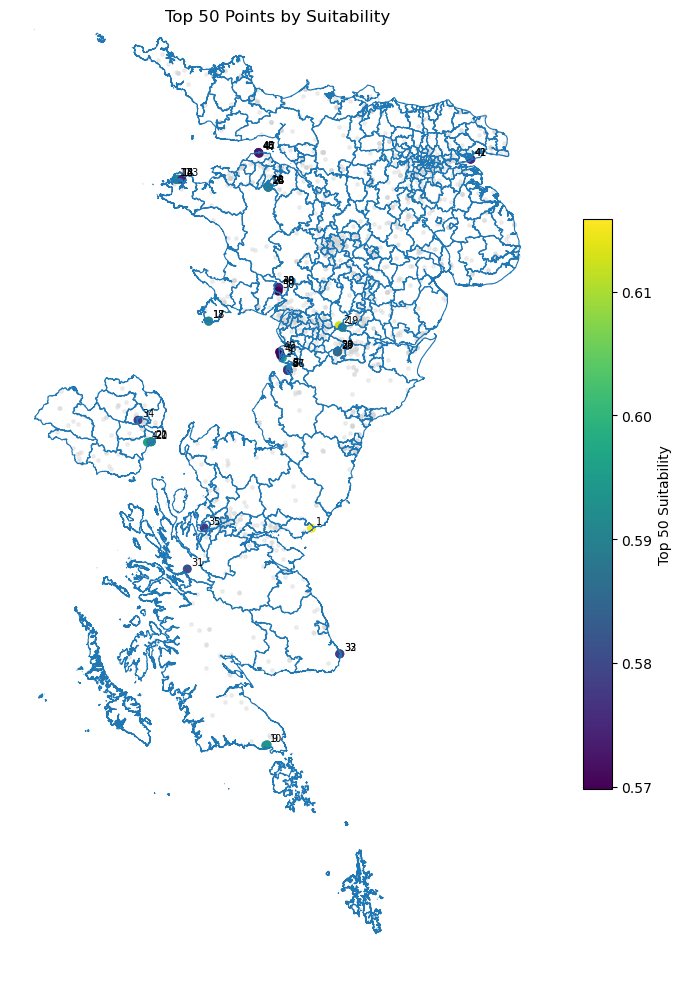

Saved: /Users/jsh/Desktop/assignment2 spatial/map_points_suitability_top50.png


In [34]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show as rioshow

BASE = "/Users/jsh/Desktop/assignment2 spatial"

# Inputs
pts_fp   = os.path.join(BASE, "points_with_scores_all.geojson")
cf_tif   = os.path.join(BASE, "uk_cf_score.tif")         
boundary = os.path.join(BASE, "uk boundary.geojson")

# Outputs
out_png1 = os.path.join(BASE, "map_points_suitability.png")
out_png2 = os.path.join(BASE, "map_points_suitability_top50.png")


pts = gpd.read_file(pts_fp)
ukb = gpd.read_file(boundary)


with rasterio.open(cf_tif) as src:
    raster_crs = src.crs
    raster_arr = src.read(1)
    raster_nodata = src.nodata


pts = pts.to_crs(raster_crs)
ukb = ukb.to_crs(raster_crs)

pts["Suitability"] = pts["Suitability"].astype(float)
pts = pts[np.isfinite(pts["Suitability"])].copy()


fig, ax = plt.subplots(1, 1, figsize=(8, 10))


mask = None
if raster_nodata is not None:
    mask = np.where(raster_arr == raster_nodata, np.nan, raster_arr)
else:
    mask = raster_arr

rioshow(mask, ax=ax, alpha=0.35)  # faint background


ukb.boundary.plot(ax=ax, linewidth=0.8)


pts.plot(
    ax=ax,
    column="Suitability",
    cmap="viridis",
    markersize=12,
    legend=True,
    legend_kwds={"shrink": 0.6, "label": "Suitability (0–1)"},
)

ax.set_title("Point Suitability (AHP composite score)")
ax.set_axis_off()
plt.tight_layout()
plt.savefig(out_png1, dpi=300)
plt.show()

print("Saved:", out_png1)


TOP_N = 50
top = pts.sort_values("Suitability", ascending=False).head(TOP_N).copy()

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

rioshow(mask, ax=ax, alpha=0.35)
ukb.boundary.plot(ax=ax, linewidth=0.8)


pts.plot(ax=ax, color="lightgray", markersize=6, alpha=0.35)


top.plot(
    ax=ax,
    column="Suitability",
    cmap="viridis",
    markersize=30,
    legend=True,
    legend_kwds={"shrink": 0.6, "label": f"Top {TOP_N} Suitability"},
)


for i, (idx, row) in enumerate(top.iterrows(), start=1):
    ax.annotate(
        str(i),
        (row.geometry.x, row.geometry.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=7
    )

ax.set_title(f"Top {TOP_N} Points by Suitability")
ax.set_axis_off()
plt.tight_layout()
plt.savefig(out_png2, dpi=300)
plt.show()

print("Saved:", out_png2)
